In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

In [3]:
print("hello codespace")

hello codespace


In [2]:
## read data file
df = pd.read_csv('car_fuel_efficiency.csv')

df.head(2)

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
0,170,3.0,159.0,3413.433759,17.7,2003,Europe,Gasoline,All-wheel drive,0.0,13.231729
1,130,5.0,97.0,3149.664934,17.8,2007,USA,Gasoline,Front-wheel drive,0.0,13.688217


In [4]:
## Preparing the dataset
    ## use only desired columns
df1 = df.copy()
df1 =df1.loc[:,['engine_displacement','horsepower','vehicle_weight','model_year', 'fuel_efficiency_mpg']]

In [5]:
df1.head(2)

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
0,170,159.0,3413.433759,2003,13.231729
1,130,97.0,3149.664934,2007,13.688217


<Axes: xlabel='fuel_efficiency_mpg', ylabel='Count'>

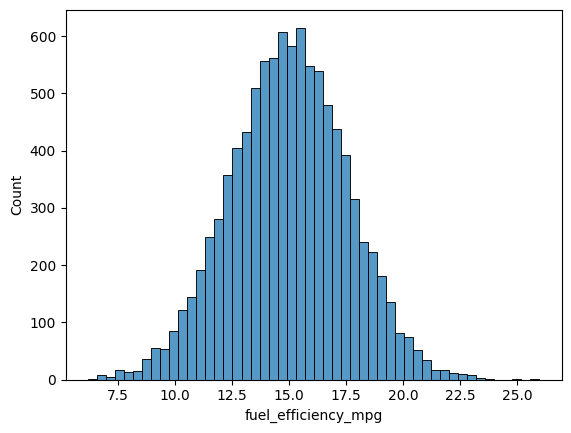

In [6]:
## EDA
    ## Look at the fuel_efficiency_mpg variable. Does it have a long tail?

%matplotlib inline

sns.histplot(df1['fuel_efficiency_mpg'], bins=50)


## EDA Answer = fuel_efficiency_mpg does not have a long tail. The values are normally distributed



In [7]:
## Question 1 = There's one column with missing values. What is it?

df1.isnull().sum()

##Answer = horsepower column has the missing values

engine_displacement      0
horsepower             708
vehicle_weight           0
model_year               0
fuel_efficiency_mpg      0
dtype: int64

In [8]:
## Question 2 = What is the median (50% percentile) for variable "horsepower"?


print(f'median value for horsepower is: {df1.horsepower.describe()[5]}')
df1.horsepower.describe()

# Answer = median value is 149

median value for horsepower is: 149.0


/tmp/ipykernel_8908/3154799106.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f'median value for horsepower is: {df1.horsepower.describe()[5]}')


count    8996.000000
mean      149.657292
std        29.879555
min        37.000000
25%       130.000000
50%       149.000000
75%       170.000000
max       271.000000
Name: horsepower, dtype: float64

In [59]:
### QUESTION 2 = Prepare and split the dataset
## shuffle the dataset and use seed 42

## SPlit data into Train/Val/Test sets with 60%/20%/20% distribution

## calculate count of observations per data set (train, validate, test)
n = len(df1)
n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test

## create random shuffle component to randomly create data sets
idx = np.arange(n)
np.random.seed(42)
np.random.shuffle(idx)

## create random data sets for each (train, validate, test)
    ## data sets will be subfiltered DataFrame

df_train = df1.iloc[idx[:n_train]]
df_val = df1.iloc[idx[n_train:n_train + n_val]]
df_test = df1.iloc[idx[n_train+n_val:]]

## drop indexes on data sets saved to respective DataFrames
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

# QUESTION 3

We need to deal with missing values for the column from Q1.

We have two options: fill it with 0 or with the mean of this variable.

Try both options. For each, train a linear regression model without regularization using the 
code from the lessons.

For computing the mean, use the training only!

Use the validation dataset to evaluate the models and compare the RMSE of each option.

Round the RMSE scores to 2 decimal digits using round(score, 2)

Which option gives better RMSE?

In [13]:
## deal with missing values in "horsepower" column
df1.isnull().sum()

engine_displacement      0
horsepower             708
vehicle_weight           0
model_year               0
fuel_efficiency_mpg      0
dtype: int64

### Missing values Option 1 = fillna set to 0 and train regression model

In [11]:
df_train.isnull().sum()

engine_displacement      0
horsepower             429
vehicle_weight           0
model_year               0
fuel_efficiency_mpg      0
dtype: int64

In [60]:
## Fillna with Zeros
df_train.fillna(0, inplace=True)
df_val.fillna(0, inplace=True)
df_test.fillna(0, inplace=True)

print(f'df train nulls: {df_train.isnull().sum()}')
print(f'df val nulls: {df_val.isnull().sum()}')
print(f'df test nulls: {df_test.isnull().sum()}')



df train nulls: engine_displacement    0
horsepower             0
vehicle_weight         0
model_year             0
fuel_efficiency_mpg    0
dtype: int64
df val nulls: engine_displacement    0
horsepower             0
vehicle_weight         0
model_year             0
fuel_efficiency_mpg    0
dtype: int64
df test nulls: engine_displacement    0
horsepower             0
vehicle_weight         0
model_year             0
fuel_efficiency_mpg    0
dtype: int64


In [61]:
## save out predictor variable "y"
y_train = df_train['fuel_efficiency_mpg'].values
y_val = df_val['fuel_efficiency_mpg'].values
y_test = df_test['fuel_efficiency_mpg'].values

## drop predictor variable from dataframes (train, validate, test)
del df_train['fuel_efficiency_mpg']
del df_val['fuel_efficiency_mpg']
del df_test['fuel_efficiency_mpg']

In [22]:
## Save "X" array with all required features
df_train.head(2)

,engine_displacement,horsepower,vehicle_weight,model_year
0,220,144.0,2535.887591,2009
1,160,141.0,2741.170484,2019


In [25]:
## y predictor variable already created
y_train

array([16.64294342, 16.29837715, 18.59182197, ..., 17.59323665,
       18.92574819, 17.96528447], shape=(5824,))

In [62]:
## Create Features Array
X_train = df_train.values

## y_train already has y predictor variable


def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])            ##create bias term
    X = np.column_stack([ones, X])        ## stack bias term into Feature Array X

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [29]:
train_linear_regression(X_train, y_train)

(np.float64(28.82736547365895),
 array([ 9.93613218e-05,  3.54221891e-03, -5.01328015e-03,  3.42992870e-04]))

In [63]:
## Set weights to output of linear regression training
    ## w0 = intercept
    ## w1 = weights for all of the X features  (the "coefficients")
w0, w = train_linear_regression(X_train, y_train)

w0, w

(np.float64(28.82736547365895),
 array([ 9.93613218e-05,  3.54221891e-03, -5.01328015e-03,  3.42992870e-04]))

In [33]:
df1.head(2)

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
0,170,159.0,3413.433759,2003,13.231729
1,130,97.0,3149.664934,2007,13.688217


### Use validation dataset to evaluate the model where missing horsepower values are set to 0

In [64]:
## save X features to array for "df_val" Dataframe containing all features
X_val = df_val.values


## Use Trained Regression model to predict on validation dataset
y_pred = w0 + X_val.dot(w)

In [42]:
## function to calculate Root Mean Square Error
    ## lower the RMSE the better

def rmse(y, y_pred):
    se = (y - y_pred)**2
    mse= se.mean()
    return np.sqrt(mse)

In [65]:
## This is the validation RMSE based on the linear regression model that used "fillna" 0 whenever there were missing values for "horsepower"

print(f' RMSE for fillna(0) training data: {round(rmse(y_val, y_pred), 2)}')

 RMSE for fillna(0) training data: 0.52


## Missing Values Option 2 = fillna set to mean of training data.

Then train regression model and validate on validation data

In [47]:
## calculate count of observations per data set (train, validate, test)
n = len(df1)
n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test

## create random shuffle component to randomly create data sets
idx = np.arange(n)
np.random.seed(42)
np.random.shuffle(idx)

## create random data sets for each (train, validate, test)
    ## data sets will be subfiltered DataFrame

df_train = df1.iloc[idx[:n_train]]
df_val = df1.iloc[idx[n_train:n_train + n_val]]
df_test = df1.iloc[idx[n_train+n_val:]]

## drop indexes on data sets saved to respective DataFrames
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [49]:
## what is mean value of horspower in df_train?

df_train.horsepower.mean()

np.float64(149.54476367006487)

In [50]:
## set mean horsepower from training data set to fillna( ) all missing occurrences of horsepower
    ## in training , validation, and test dataset

mean_horsepower = df_train.horsepower.mean()

df_train.fillna(mean_horsepower, inplace=True)
df_val.fillna(mean_horsepower, inplace=True)
df_test.fillna(mean_horsepower, inplace=True)

In [53]:
## Set y predictor variable to array and drop variable from feature space
    ## (train , validate, and test datasets)

df_train.head(2)

y_train = df_train['fuel_efficiency_mpg'].values
y_val = df_val['fuel_efficiency_mpg'].values
y_test = df_test['fuel_efficiency_mpg'].values

del df_train['fuel_efficiency_mpg']
del df_val['fuel_efficiency_mpg']
del df_test['fuel_efficiency_mpg']

### Re-create linear regression and RMSE functions for practice

In [54]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])            ##create bias term
    X = np.column_stack([ones, X])        ## stack bias term into Feature Array X

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]


## function to calculate Root Mean Square Error
    ## lower the RMSE the better
def rmse(y, y_pred):
    se = (y - y_pred)**2
    mse= se.mean()
    return np.sqrt(mse)

In [57]:
## train linear regression model 
X_train = df_train.values
X_val = df_val.values

## Train linear regression model
train_linear_regression(X_train, y_train)

## Use trained model to predict on validation dataset
y_pred = w0 + X_val.dot(w)

## This is the validation RMSE based on the linear regression model that used "fillna" of mean HP whenever there were missing values for "horsepower"
print(f' RMSE for fillna(mean horsepower) training data: {round(rmse(y_val, y_pred), 2)}')

 RMSE for fillna(mean horsepower) training data: 0.5


### QUESTION #3 ANSWER

The linear regression model produces better results (lower RMSE) when the mean horsepower is used to fillna( ) when horsepower is blank. The RMSE is 0.5 while the RMSE for the regression model using fillna(0) is 0.52.

# QUESTION #4 
Now let's train a regularized linear regression.

For this question, fill the NAs with 0.

Try different values of r from this list: [0, 0.01, 0.1, 1, 5, 10, 100].

Use RMSE to evaluate the model on the validation dataset.

Round the RMSE scores to 2 decimal digits.

Which r gives the best RMSE?

If multiple options give the same best RMSE, select the smallest r.


In [ ]:
## Create random shuffled datasets (train , validate, test)

## fillna(0) 

##regularize your linear regression traning model

## calcualte RMSE on validation dataset



In [20]:
## calculate count of observations per data set (train, validate, test)
n = len(df1)
n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test

## create random shuffle component to randomly create data sets
idx = np.arange(n)
np.random.seed(42)
np.random.shuffle(idx)

## create random data sets for each (train, validate, test)
    ## data sets will be subfiltered DataFrame

df_train = df1.iloc[idx[:n_train]]
df_val = df1.iloc[idx[n_train:n_train + n_val]]
df_test = df1.iloc[idx[n_train+n_val:]]

## drop indexes on data sets saved to respective DataFrames
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [21]:
## fill missing values with 0

df_train.fillna(0, inplace=True)
df_val.fillna(0, inplace=True)
df_test.fillna(0, inplace=True)

In [22]:
## Set y predictor variable to array and drop variable from feature space
    ## (train , validate, and test datasets)

y_train = df_train['fuel_efficiency_mpg'].values
y_val = df_val['fuel_efficiency_mpg'].values
y_test = df_test['fuel_efficiency_mpg'].values

del df_train['fuel_efficiency_mpg']
del df_val['fuel_efficiency_mpg']
del df_test['fuel_efficiency_mpg']

In [23]:
## Train Linear Regression Model
    ## Use For-loop to cycle through a list of possible "regularization" values

def train_linear_regression_reg(X, y, r=1):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])     ## regularization used here to slightly alter the diagonal of the array

    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [24]:
## function to calculate Root Mean Square Error
    ## lower the RMSE the better
def rmse(y, y_pred):
    se = (y - y_pred)**2
    mse= se.mean()
    return np.sqrt(mse)

In [27]:
## For Loop to check for best RMSE

for r in [0, 0.01, 0.1, 1, 5, 10, 100]:
    X_train = df_train.values                            #convert X features to array
    X_val = df_val.values                               
    
    w0, w= train_linear_regression_reg(X_train, y_train, r=r)      #train linear regression model
    y_pred = w0 + X_val.dot(w)
    
    ## This is the validation RMSE based on the linear regression model that used "fillna" of mean HP whenever there were missing values for "horsepower"
    print(f' RMSE for fillna(0) training data & regularization of {r} : {round(rmse(y_val, y_pred), 4)}')
    

 RMSE for fillna(0) training data & regularization of 0 : 0.5174
 RMSE for fillna(0) training data & regularization of 0.01 : 0.5171
 RMSE for fillna(0) training data & regularization of 0.1 : 0.5188
 RMSE for fillna(0) training data & regularization of 1 : 0.5222
 RMSE for fillna(0) training data & regularization of 5 : 0.5229
 RMSE for fillna(0) training data & regularization of 10 : 0.523
 RMSE for fillna(0) training data & regularization of 100 : 0.5231


In [26]:
### Received the same RMSE using a round function to 4 decimals, will switch to round 3 decimals to select the lowest RMSE

### QUESTION #4 ANSWER = The best model with the lowest RMSE is the model that has regularization amount of r=0.01.

The model with a regulatization value of r=0.01 has an RMSE of 0.5171

# QUESTION #5 CALCULATE RMSE ON TRAINING MODEL USING DIFFERENT RANDOM SEEDS

We used seed 42 for splitting the data. Let's find out how selecting the seed influences our score.

Try different seed values: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9].

For each seed, do the train/validation/test split with 60%/20%/20% distribution.

Fill the missing values with 0 and train a model without regularization.

For each seed, evaluate the model on the validation dataset and collect the RMSE scores.

What's the standard deviation of all the scores? To compute the standard deviation, use np.std.

Round the result to 3 decimal digits (round(std, 3))

What's the value of std?

0.001
0.006
0.060
0.600

In [6]:
## modified Linear Regression Training Model
    ## Regularization is set to 1 so that diagonal of X feature array is not adjusted

def train_linear_regression_reg(X, y, r=1):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])     ## regularization used here with value of 1, no alteration to the diagonal of the array

    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [7]:
## function to calculate Root Mean Square Error
    ## lower the RMSE the better
def rmse(y, y_pred):
    se = (y - y_pred)**2
    mse= se.mean()
    return np.sqrt(mse)

ORIGINAL TRAIN/ VAL / TEST SPLIT OF DATASETS BELOW IN MARKDOWN

In [ ]:
# ## calculate count of observations per data set (train, validate, test)
# n = len(df1)
# n_val = int(n * 0.2)
# n_test = int(n * 0.2)
# n_train = n - n_val - n_test

# ## create random shuffle component to randomly create data sets
# idx = np.arange(n)
# np.random.seed(42)
# np.random.shuffle(idx)

# ## create random data sets for each (train, validate, test)
#     ## data sets will be subfiltered DataFrame

# df_train = df1.iloc[idx[:n_train]]
# df_val = df1.iloc[idx[n_train:n_train + n_val]]
# df_test = df1.iloc[idx[n_train+n_val:]]

# ## drop indexes on data sets saved to respective DataFrames
# df_train = df_train.reset_index(drop=True)
# df_val = df_val.reset_index(drop=True)
# df_test = df_test.reset_index(drop=True)

In [18]:
score_list = []

## For Loop of different random seeds to use for linear regression training
for seed in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]:
    ## calculate count of observations per data set (train, validate, test)
    n = len(df1)
    n_val = int(n * 0.2)
    n_test = int(n * 0.2)
    n_train = n - n_val - n_test
    
    ## create random shuffle component to randomly create data sets
    idx = np.arange(n)
    np.random.seed(seed)
    np.random.shuffle(idx)
    
    ## create random data sets for each (train, validate, test)
        ## data sets will be subfiltered DataFrame
    df_train = df1.iloc[idx[:n_train]]
    df_val = df1.iloc[idx[n_train:n_train + n_val]]
    df_test = df1.iloc[idx[n_train+n_val:]]
    
    ## drop indexes on data sets saved to respective DataFrames
    df_train = df_train.reset_index(drop=True)
    df_val = df_val.reset_index(drop=True)
    df_test = df_test.reset_index(drop=True)

    ## fill missing values with 0
    df_train.fillna(0, inplace=True)
    df_val.fillna(0, inplace=True)
    df_test.fillna(0, inplace=True)

    ## Set y predictor variable to array and drop variable from feature space
    ## (train , validate, and test datasets)
    y_train = df_train['fuel_efficiency_mpg'].values
    y_val = df_val['fuel_efficiency_mpg'].values
    y_test = df_test['fuel_efficiency_mpg'].values
    
    del df_train['fuel_efficiency_mpg']
    del df_val['fuel_efficiency_mpg']
    del df_test['fuel_efficiency_mpg']

    #convert X features to array
    X_train = df_train.values                            
    X_val = df_val.values                               

    #train linear regression model
    w0, w= train_linear_regression_reg(X_train, y_train, r=1)      
    y_pred = w0 + X_val.dot(w)
    
    ## This is the validation RMSE based on the linear regression model that used "fillna" of mean HP whenever there were missing values for "horsepower"
    print(f' RMSE for fillna(0) training data & random seed {seed} : {round(rmse(y_val, y_pred), 4)}')

    ## save scores from each Random Seed model into list
    score_list.append(round(rmse(y_val, y_pred), 4))

 RMSE for fillna(0) training data & random seed 0 : 0.527
 RMSE for fillna(0) training data & random seed 1 : 0.5285
 RMSE for fillna(0) training data & random seed 2 : 0.53
 RMSE for fillna(0) training data & random seed 3 : 0.5215
 RMSE for fillna(0) training data & random seed 4 : 0.5195
 RMSE for fillna(0) training data & random seed 5 : 0.5359
 RMSE for fillna(0) training data & random seed 6 : 0.5386
 RMSE for fillna(0) training data & random seed 7 : 0.5171
 RMSE for fillna(0) training data & random seed 8 : 0.5234
 RMSE for fillna(0) training data & random seed 9 : 0.5197


In [19]:
score_list

[np.float64(0.527),
 np.float64(0.5285),
 np.float64(0.53),
 np.float64(0.5215),
 np.float64(0.5195),
 np.float64(0.5359),
 np.float64(0.5386),
 np.float64(0.5171),
 np.float64(0.5234),
 np.float64(0.5197)]

In [21]:
## What is the standard deviation of all of the scores?

round(np.std(score_list),3)

np.float64(0.007)

### QUESTION 5 ANSWER = The standard deviation of all of the scores rounded to 3 decimals is 0.007

# QUESTION 6

Split the dataset like previously, use seed 9.

Combine train and validation datasets.

Fill the missing values with 0 and train a model with r=0.001.

What's the RMSE on the test dataset?

Options:

0.15

0.515

5.15

51.5

In [27]:
## Linear Regression Model without regularization "r" variable

def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])            ##create bias term
    X = np.column_stack([ones, X])        ## stack bias term into Feature Array X

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [28]:
## calculate count of observations per data set (train, validate, test)
n = len(df1)
n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test

## create random shuffle component to randomly create data sets
idx = np.arange(n)
np.random.seed(9)
np.random.shuffle(idx)

## create random data sets for each (train, validate, test)
    ## data sets will be subfiltered DataFrame
df_train = df1.iloc[idx[:n_train]]
df_val = df1.iloc[idx[n_train:n_train + n_val]]
df_test = df1.iloc[idx[n_train+n_val:]]

## drop indexes on data sets saved to respective DataFrames
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

## fill missing values with 0
df_train.fillna(0, inplace=True)
df_val.fillna(0, inplace=True)
df_test.fillna(0, inplace=True)

In [29]:
## Set y predictor variable to array and drop variable from feature space
## (train , validate, and test datasets)
y_train = df_train['fuel_efficiency_mpg'].values
y_val = df_val['fuel_efficiency_mpg'].values
y_test = df_test['fuel_efficiency_mpg'].values

del df_train['fuel_efficiency_mpg']
del df_val['fuel_efficiency_mpg']
del df_test['fuel_efficiency_mpg']

In [30]:
## Concatenate Train and Validation sets into 1 whole training set

df_full_train = pd.concat([df_train, df_val])
y_full_train = np.concatenate([y_train, y_val])

In [32]:
#convert X features to array
X_full_train = df_full_train.values                            
X_test = df_test.values                               

#train linear regression model
w0, w= train_linear_regression_reg(X_full_train, y_full_train)      
y_pred = w0 + X_test.dot(w)

## This is the validation RMSE based on the linear regression model that used "fillna" of mean HP whenever there were missing values for "horsepower"
print(f' RMSE for fillna(0) full training, random seed:{seed}, and no regularization : {round(rmse(y_val, y_pred), 4)}')

 RMSE for fillna(0) full training, random seed:9, and no regularization : 3.5018


### QUESTION #6 ANSWER =

The RMSE for training the model with Fillna(0), no Regularization, and combining Test and Validation sets is 3.5018. The closes answer to this on 2025 Cohort homework #2 is 5.15